# **Module 7 Final Project**
## Matthew Upchurch UKY - MAP674

------------------------------------------------------------------------------------------------------------------------

## Table of Contents
1. [Import modules](#Import)
2. [Pull in GIS data](#Pull)
3. [Inspect data](#Inspect)
4. [Clean data](#Clean)
5. [Pull in CSV](#csv)
6. [Join data and output to file](#Join)

------------------------------------------------------------------------------------------------------------------------

## Import

Here I am importing the necessary libraries for this project

In [49]:
%matplotlib inline

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

## Pull

I use the GeoPandas read_file method to pull in the states dataset from natural earth

In [2]:
states_raw = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip')

## Inspect

I utilize several methods to inspect the dataset I am working with in order to make sure I have what I need

In [3]:
type(states_raw)

geopandas.geodataframe.GeoDataFrame

In [4]:
states_raw.tail()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
95,Admin-1 scale rank,2,USA-3540,3540,US-VT,http://en.wikipedia.org/wiki/Vermont,US,1,Vermont,VT,...,Vermont,Vermont,Vermont,Вермонт,Vermont,Vermont,Vermont,佛蒙特州,1159315305,POLYGON ((-73.35218221090553 45.00541896831666...
96,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,Washington,Waszyngton,Washington,Вашингтон,Washington,Vaşington,Washington,华盛顿州,1159309547,(POLYGON ((-122.7887765039885 48.9930277630099...
97,Admin-1 scale rank,2,USA-3553,3553,US-WI,http://en.wikipedia.org/wiki/Wisconsin,US,1,Wisconsin,WI|Wis.,...,Wisconsin,Wisconsin,Wisconsin,Висконсин,Wisconsin,Wisconsin,Wisconsin,威斯康辛州,1159315321,POLYGON ((-90.65058497039659 42.51298357050342...
98,Admin-1 scale rank,2,USA-3554,3554,US-WV,http://en.wikipedia.org/wiki/West_Virginia,US,1,West Virginia,WV|W.Va.,...,West Virginia,Wirginia Zachodnia,Virgínia Ocidental,Западная Виргиния,West Virginia,Batı Virginia,Tây Virginia,西維吉尼亞州,1159315323,"POLYGON ((-81.9652770218909 37.53972532414805,..."
99,Admin-1 scale rank,2,USA-3527,3527,US-WY,http://en.wikipedia.org/wiki/Wyoming,US,1,Wyoming,WY|Wyo.,...,Wyoming,Wyoming,Wyoming,Вайоминг,Wyoming,Wyoming,Wyoming,怀俄明州,1159315351,POLYGON ((-104.0216554267515 41.00085826867979...


In [5]:
states_raw.area

0     227.805326
1     116.199472
2      92.324811
3     152.235764
4       7.350263
         ...    
95      2.761973
96     20.709220
97     19.212033
98      6.477875
99     28.087948
Length: 100, dtype: float64

In [6]:
states_raw.crs

{'init': 'epsg:4326'}

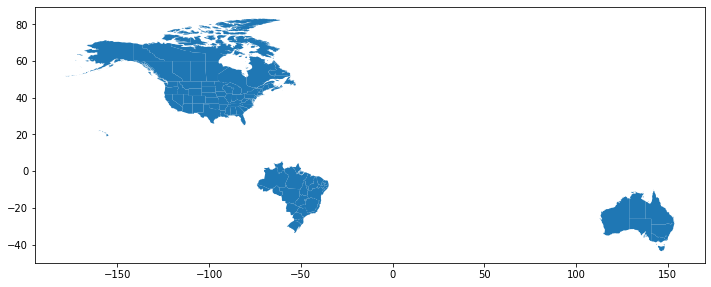

In [7]:
ax = states_raw.plot(figsize=(12,12));

# Clean

I only want the contiguous US in order to have a clean looking plot. This particular dataset comes with states in Brazil as well as Australia so I needed to get rid of those, as well as Alaska and Hawaii.

In [8]:
# usa = states_raw['iso_a2'] == 'US'
usa = states_raw[states_raw['iso_a2'] == "US"]

In [9]:
usa

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
49,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,Alaska,Alaska,Alasca,Аляска,Alaska,Alaska,Alaska,阿拉斯加州,1159308731,(POLYGON ((-139.0565188237724 60.0015816497498...
50,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,Alabama,Alabama,Alabama,Алабама,Alabama,Alabama,Alabama,亚拉巴马州,1159315233,(POLYGON ((-87.48951063106118 30.3776828146096...
51,Admin-1 scale rank,2,USA-3528,3528,US-AR,http://en.wikipedia.org/wiki/Arkansas,US,1,Arkansas,AR|Ark.,...,Arkansas,Arkansas,Arkansas,Арканзас,Arkansas,Arkansas,Arkansas,阿肯色州,1159315355,POLYGON ((-89.70477194603545 36.00157341000346...
52,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,Arizona,Arizona,Аризона,Arizona,Arizona,Arizona,亞利桑那州,1159315341,POLYGON ((-109.0478073518824 31.32787938405994...
53,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Californië,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,(POLYGON ((-114.6105425494355 34.9911168284888...
54,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,Colorado,Kolorado,Colorado,Колорадо,Colorado,Colorado,Colorado,科羅拉多州,1159315343,POLYGON ((-109.0466702668781 37.00084590906019...
55,Admin-1 scale rank,2,USA-3537,3537,US-CT,http://en.wikipedia.org/wiki/Connecticut,US,1,Connecticut,CT|Conn.,...,Connecticut,Connecticut,Connecticut,Коннектикут,Connecticut,Connecticut,Connecticut,康乃狄克州,1159315301,"POLYGON ((-71.80083571617948 42.0119630435785,..."
56,Admin-1 scale rank,2,USA-3556,3556,US-DC,"http://en.wikipedia.org/wiki/Washington,_D.C.",US,1,District of Columbia,DC|D.C.,...,Washington D.C.,Waszyngton,Washington,Вашингтон,Washington,Washington,Washington,華盛頓哥倫比亞特區,1159315327,POLYGON ((-77.03036106215441 38.88925296351908...
57,Admin-1 scale rank,2,USA-3555,3555,US-DE,http://en.wikipedia.org/wiki/Delaware,US,1,Delaware,DE|Del.,...,Delaware,Delaware,Delaware,Делавэр,Delaware,Delaware,Delaware,特拉华州,1159315325,POLYGON ((-75.03766079082644 38.45558961689801...
58,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,Florida,Floryda,Flórida,Флорида,Florida,Florida,Florida,佛罗里达州,1159315207,(POLYGON ((-87.48951063106118 30.3776828146096...


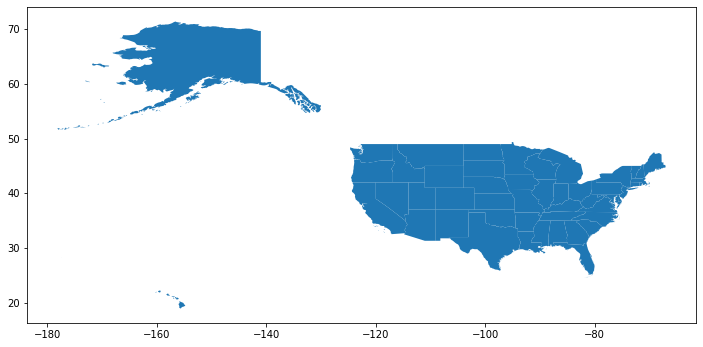

In [10]:
ax = usa.plot(figsize=(12,12));

In [11]:
contiguous = usa.query('name != "Alaska" & name != "Hawaii"')

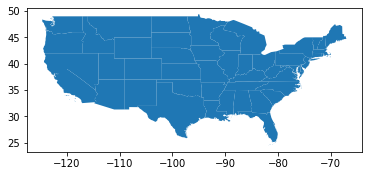

In [12]:
contiguous.plot()

In [16]:
contiguous

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
50,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,Alabama,Alabama,Alabama,Алабама,Alabama,Alabama,Alabama,亚拉巴马州,1159315233,(POLYGON ((-87.48951063106118 30.3776828146096...
51,Admin-1 scale rank,2,USA-3528,3528,US-AR,http://en.wikipedia.org/wiki/Arkansas,US,1,Arkansas,AR|Ark.,...,Arkansas,Arkansas,Arkansas,Арканзас,Arkansas,Arkansas,Arkansas,阿肯色州,1159315355,POLYGON ((-89.70477194603545 36.00157341000346...
52,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,Arizona,Arizona,Аризона,Arizona,Arizona,Arizona,亞利桑那州,1159315341,POLYGON ((-109.0478073518824 31.32787938405994...
53,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Californië,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,(POLYGON ((-114.6105425494355 34.9911168284888...
54,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,Colorado,Kolorado,Colorado,Колорадо,Colorado,Colorado,Colorado,科羅拉多州,1159315343,POLYGON ((-109.0466702668781 37.00084590906019...
55,Admin-1 scale rank,2,USA-3537,3537,US-CT,http://en.wikipedia.org/wiki/Connecticut,US,1,Connecticut,CT|Conn.,...,Connecticut,Connecticut,Connecticut,Коннектикут,Connecticut,Connecticut,Connecticut,康乃狄克州,1159315301,"POLYGON ((-71.80083571617948 42.0119630435785,..."
56,Admin-1 scale rank,2,USA-3556,3556,US-DC,"http://en.wikipedia.org/wiki/Washington,_D.C.",US,1,District of Columbia,DC|D.C.,...,Washington D.C.,Waszyngton,Washington,Вашингтон,Washington,Washington,Washington,華盛頓哥倫比亞特區,1159315327,POLYGON ((-77.03036106215441 38.88925296351908...
57,Admin-1 scale rank,2,USA-3555,3555,US-DE,http://en.wikipedia.org/wiki/Delaware,US,1,Delaware,DE|Del.,...,Delaware,Delaware,Delaware,Делавэр,Delaware,Delaware,Delaware,特拉华州,1159315325,POLYGON ((-75.03766079082644 38.45558961689801...
58,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,Florida,Floryda,Flórida,Флорида,Florida,Florida,Florida,佛罗里达州,1159315207,(POLYGON ((-87.48951063106118 30.3776828146096...
59,Admin-1 scale rank,2,USA-3543,3543,US-GA,http://en.wikipedia.org/wiki/Georgia_(U.S._state),US,6,Georgia,GA|Ga.,...,Georgia,Georgia,Geórgia,Джорджия,Georgia,Georgia,Georgia,喬治亞州,1159311857,(POLYGON ((-85.0072815324654 31.00167331692866...


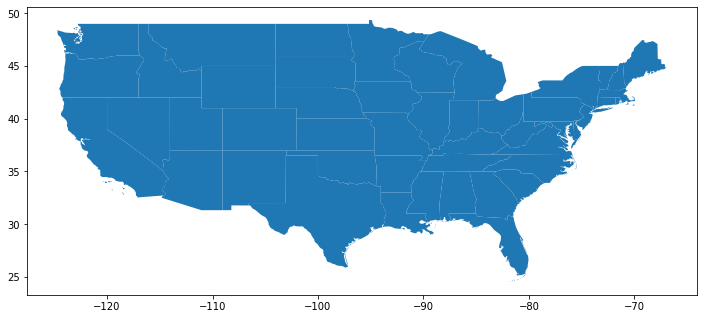

In [17]:
ax = contiguous.plot(figsize=(12,12));

## csv

I wanted to be able to add something to the map that I could symbolize. I decided population would be a decent and plain exercise to demonstrate a workflow. I had originally inteded to use geoplot on here before I remembered that the purpose of this is to create the backend workflow and it's going to end up on a web map so any symbolization in the notebook would not be necessary and need to be done with JS anyways. 

In [36]:
df = pd.read_csv('./data/populations.csv') # load csv data as pandas DataFrame

In [37]:
df.head()

,name,pop
0,Alabama,4858979
1,Arizona,6828065
2,Arkansas,2978204
3,California,39144818
4,Colorado,5456574


## Join

Here I pull in the CSV to a Pandas dataframe and join it up with my existing GeoPandas GeoDataFrame. I also perform a few last minute sanity checks and export it out to a JSON to be utilized in the web map.

_observation:_ I was pleasantly surprised that (even though I know GeoPandas is an extention of Pandas) you can seamlessly join a DataFrame with a GeoDataFrame without any fussing! 

In [39]:
# combine 2 DataFrames
merged = pd.merge(contiguous, df, how='left', on='name')

In [40]:
merged

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,pop
0,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,Alabama,Alabama,Алабама,Alabama,Alabama,Alabama,亚拉巴马州,1159315233,(POLYGON ((-87.48951063106118 30.3776828146096...,4858979
1,Admin-1 scale rank,2,USA-3528,3528,US-AR,http://en.wikipedia.org/wiki/Arkansas,US,1,Arkansas,AR|Ark.,...,Arkansas,Arkansas,Арканзас,Arkansas,Arkansas,Arkansas,阿肯色州,1159315355,POLYGON ((-89.70477194603545 36.00157341000346...,2978204
2,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,Arizona,Аризона,Arizona,Arizona,Arizona,亞利桑那州,1159315341,POLYGON ((-109.0478073518824 31.32787938405994...,6828065
3,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,(POLYGON ((-114.6105425494355 34.9911168284888...,39144818
4,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,Kolorado,Colorado,Колорадо,Colorado,Colorado,Colorado,科羅拉多州,1159315343,POLYGON ((-109.0466702668781 37.00084590906019...,5456574
5,Admin-1 scale rank,2,USA-3537,3537,US-CT,http://en.wikipedia.org/wiki/Connecticut,US,1,Connecticut,CT|Conn.,...,Connecticut,Connecticut,Коннектикут,Connecticut,Connecticut,Connecticut,康乃狄克州,1159315301,"POLYGON ((-71.80083571617948 42.0119630435785,...",3590886
6,Admin-1 scale rank,2,USA-3556,3556,US-DC,"http://en.wikipedia.org/wiki/Washington,_D.C.",US,1,District of Columbia,DC|D.C.,...,Waszyngton,Washington,Вашингтон,Washington,Washington,Washington,華盛頓哥倫比亞特區,1159315327,POLYGON ((-77.03036106215441 38.88925296351908...,672228
7,Admin-1 scale rank,2,USA-3555,3555,US-DE,http://en.wikipedia.org/wiki/Delaware,US,1,Delaware,DE|Del.,...,Delaware,Delaware,Делавэр,Delaware,Delaware,Delaware,特拉华州,1159315325,POLYGON ((-75.03766079082644 38.45558961689801...,945934
8,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,Floryda,Flórida,Флорида,Florida,Florida,Florida,佛罗里达州,1159315207,(POLYGON ((-87.48951063106118 30.3776828146096...,20271272
9,Admin-1 scale rank,2,USA-3543,3543,US-GA,http://en.wikipedia.org/wiki/Georgia_(U.S._state),US,6,Georgia,GA|Ga.,...,Georgia,Geórgia,Джорджия,Georgia,Georgia,Georgia,喬治亞州,1159311857,(POLYGON ((-85.0072815324654 31.00167331692866...,10214860


In [41]:
merged.crs

{'init': 'epsg:4326'}

In [43]:
# include the columns I want
final_dataset = merged[merged.columns[merged.columns.isin(['name', 'geometry', 'pop'])]]

In [46]:
type(final_dataset)

geopandas.geodataframe.GeoDataFrame

In [51]:
if os.path.exists('data/states_w_pop.json'):
  os.remove('data/states_w_pop.json')

In [52]:
with open('./data/states_w_pop.json', 'w') as f:
    f.write(final_dataset.to_json())